<a href="https://colab.research.google.com/github/MuhammadIrzam447/visionCodes/blob/master/text_ferramenta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/ferramenta/text-ferramenta-train.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,fixpoint punta di ricambio per i tool sd 098 i tool sd 099 punta di ricambio per stazione digitale di saldatura i tool sd 098|_@accessori_saldatore_
0,c.k t6103a pompa per dissaldatura c.k t6103a p...
1,draper 13042 set di punzone e scalpello draper...
2,draper 36583 voltmetro versione pesante draper...
3,unbekannt thyssen 80023a elettrodi per saldatu...
4,facom sc.av.bt2 cacciavite rilevatore di basse...


# EDA

In [ ]:
# Rename the head of the column
df.columns = ['text']

In [ ]:
# Create the Label Column
df['label'] = df['text'].str.split("\|_@", n=1).str[1]
df['text'] = df['text'].str.split("\|_@", n=1).str[0]

In [ ]:
df2 = df.copy()

In [ ]:
df2.head(30)

In [ ]:
df2.shape

(66140, 2)

In [ ]:
# Drop the duplicate and null values
df2.drop_duplicates(inplace=True)
df2.dropna(inplace = True) 
df2.reset_index(drop = True, inplace = True)

In [ ]:
df2.shape

(65198, 2)

In [ ]:
df2.describe()

,text,label
count,65198,65198
unique,65188,52
top,stanley flessometro 5mt metallo abs stanley un...,vite_bullone_
freq,2,6585


In [ ]:
df2['label'].value_counts()

# Cleaning Data

In [ ]:
# 32 g/gr/ (32 grams)
# 15 mm (15 milimeter) 
# kg (kilogaram)
# kwb ?
# lb (pounds)
# cm (centimeter)
# sw ?
# oz 
# tm
# p 
# pesso

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df2['text'] = df2['text'].str.lower()

In [ ]:
# import re
# df2['text'] = df2['text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', str(x)))
# removing everything except alphabets is drastic as it is making a huge change in input data. how to do it better. 

In [ ]:
df2['text'] = df2['text'].apply(word_tokenize, language = "italian")

In [ ]:
stop_words = set(stopwords.words('italian'))
df2['text'] = df2['text'].apply(lambda x: [word for word in x if word not in stop_words])

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('italian')
df2['text'] = df2['text'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
replacements = {'kg': 'kilogram',
                'mm': 'millimeter', 
                'cm': 'centimeter',
                'gr': 'gram',
                'g': 'gram',
                'lb': 'pounds',
                'oz': 'ounce',
                'mv': 'milivott',
                'm': 'meter',
                'ft': 'feet'}

In [ ]:
def replace_words(tokens):
    return [replacements.get(token, token) for token in tokens]

In [ ]:
df2['text'] = df2['text'].apply(replace_words)

In [ ]:
df2.head(10)

,text,label
0,"[c.k, t6103a, pomp, dissaldatur, c.k, t6103a, ...",accessori_saldatore_
1,"[draper, 13042, set, punzon, scalpell, draper,...",accessori_saldatore_
2,"[draper, 36583, voltmetr, version, pesant, dra...",accessori_saldatore_
3,"[unbekannt, thyssen, 80023a, elettrod, saldatu...",accessori_saldatore_
4,"[facom, sc.av.bt2, cacciav, rilev, bass, tensi...",accessori_saldatore_
5,"[ks, tools, 332.0408, fres, punt, saldatur, hs...",accessori_saldatore_
6,"[rolson, 28224, cacciav, precision, 8, 1, rols...",accessori_saldatore_
7,"[ks, tools, 332.0938, ser, punt, dopp, elic, p...",accessori_saldatore_
8,"[mecafer, 160115, martell, scalpell, professio...",accessori_saldatore_
9,"[paracarr, acciai, inox, diametr, millimeter, ...",accessori_saldatore_


# Top 10 Words in Text

In [ ]:
# Joining the words back into a single text
df2['final_text'] = df2['text'].apply(lambda x: ' '.join(x))

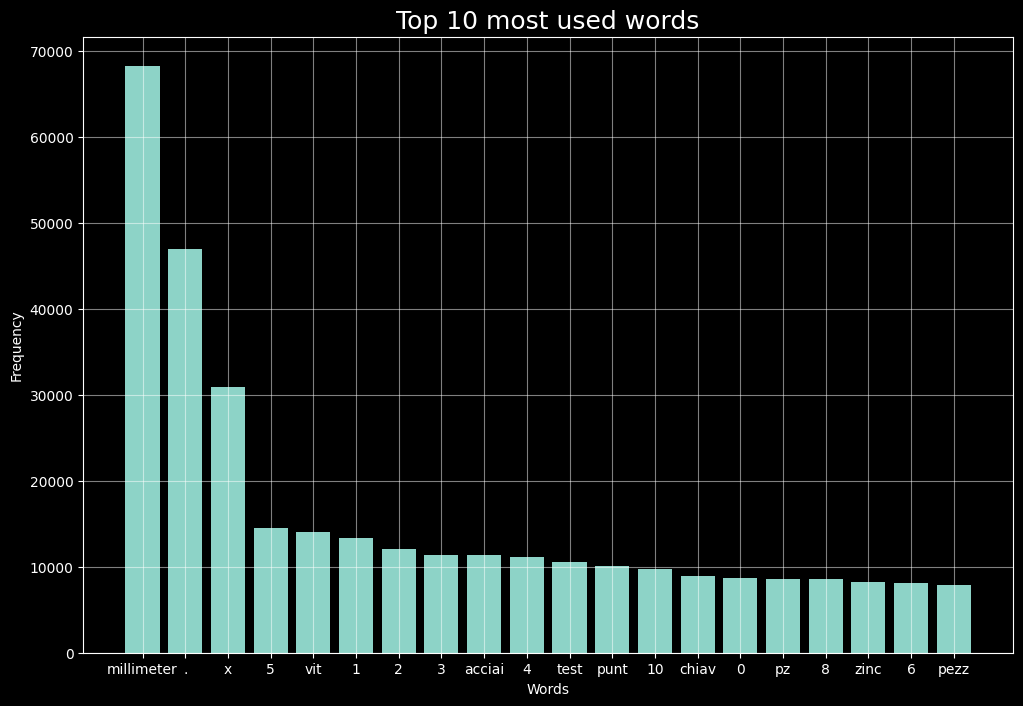

In [ ]:
import matplotlib.pyplot as plt
import collections
words = []
for text in df2['final_text']:
    words.extend(text.split())
word_count = collections.Counter(words)
top_words = dict(word_count.most_common(20))

# Dark Background
plt.style.use('dark_background')
plt.figure(figsize = (12, 8))

# Create the Barplot
plt.bar(range(len(top_words)), list(top_words.values()), align='center')

plt.xticks(range(len(top_words)), list(top_words.keys()))
# Grid Opacity
plt.grid(alpha = 0.5)
# Title
plt.title('Top 10 most used words', fontsize = 18)
# Labels
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.show()

# Testing

In [ ]:
# Create the word2vec from scratch

In [ ]:
from gensim.models import Word2Vec
# Assuming 'italian_corpus' is a list of preprocessed Italian text
model = Word2Vec(sentences=df2['text'], size=100, window=5, min_count=5, workers=4)

TypeError: ignored

In [ ]:
# !wget -P /content/drive/MyDrive/Colab Notebooks/ferramenta/ "model_url"

In [ ]:
# !pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import KeyedVectors

# Load the pre-trained Word2Vec model
# word2vec_model = KeyedVectors.load_word2vec_format('https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz', binary=True)
from gensim.models import Word2Vec
model = Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, norm_only=True)
# model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

AttributeError: ignored

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://drive.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM" -O GoogleNews-vectors-negative300.bin.gz && rm -rf /tmp/cookies.txt

--2023-05-30 19:21:51--  https://drive.google.com/uc?export=download&confirm=t&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM
Resolving drive.google.com (drive.google.com)... 172.217.203.138, 172.217.203.100, 172.217.203.139, ...
Connecting to drive.google.com (drive.google.com)|172.217.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6r9opq330hs0e5g9ob94br9v3c02ptaf/1685474475000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download&uuid=0c7aaeec-0b1d-4ddb-8d25-5c70fc5312be [following]
--2023-05-30 19:21:51--  https://doc-0g-8s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6r9opq330hs0e5g9ob94br9v3c02ptaf/1685474475000/06848720943842814915/*/0B7XkCwpI5KDYNlNUTTlSS21pQmM?e=download&uuid=0c7aaeec-0b1d-4ddb-8d25-5c70fc5312be
Resolving doc-0g-8s-docs.googleusercontent.com (doc-0g-8s-docs.googleusercontent.com)... 142.250.97.132, 2607:f

In [ ]:
!gunzip GoogleNews-vectors-negative300.bin.gz

In [ ]:
import gensim
from gensim import models
from gensim.models import Word2Vec

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
#model = Word2Vec.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, norm_only=True) -> Deprecated
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) #without *norm_only* param


In [ ]:
model = Word2Vec(corpus)

TypeError: ignored

# Word Embedding using Word2Vec

In [ ]:
import gensim
from gensim import models
from gensim.models import Word2Vec

In [ ]:
import gensim.downloader as api
info = api.info()  # show info about available models/datasets
model = api.load("word2vec-google-news-300") 

[=================================================-] 99.9% 1661.3/1662.8MB downloaded


In [ ]:
tokenized_data = df['text'].apply(lambda x: x.split())

In [ ]:
tokenized_data

0        [c.k, t6103a, pompa, per, dissaldatura, c.k, t...
1        [draper, 13042, set, di, punzone, e, scalpello...
2        [draper, 36583, voltmetro, versione, pesante, ...
3        [unbekannt, thyssen, 80023a, elettrodi, per, s...
4        [facom, sc.av.bt2, cacciavite, rilevatore, di,...
                               ...                        
66135    [fischer, 40881, classic, fast, 6, x, 220, tg,...
66136    [fischer, classic, fast, 4, x, 40, testa, svas...
66137    [forgefix, ds4555, vite, pozidriv, per, copert...
66138    [dresselhaus, jd, 79, viti, truciolari, con, t...
66139    [dresselhaus, viti, svasate, 4, 8, con, intagl...
Name: text, Length: 66140, dtype: object

In [ ]:
import numpy as np
embeddings = np.zeros((len(tokenized_data), model.vector_size))

In [ ]:
# Try this one instead
for i, tokens in enumerate(tokenized_data):
    for token in tokens:
        if token in model:
            embeddings[i] += model[token]

In [ ]:
embeddings[10]

array([-4.98291016e-01,  2.20214844e-01,  3.41705322e-01,  1.20605469e-01,
        6.26708984e-01,  5.34179688e-01, -2.57141113e-01,  9.91210938e-02,
        4.24316406e-01,  3.57177734e-01, -6.86523438e-01,  7.05261230e-02,
       -1.77368164e-01,  2.58300781e-01, -8.42285156e-02, -2.64221191e-01,
       -2.26562500e-01,  4.91333008e-01, -4.29794312e-01, -7.13378906e-01,
       -1.19824219e+00, -3.43994141e-01, -8.02947998e-01,  2.10449219e-01,
        1.95434570e-01, -7.16186523e-01, -5.67138672e-01,  1.05917358e+00,
        4.91699219e-01, -4.48364258e-01, -7.23632812e-01, -6.62597656e-01,
       -2.61596680e-01, -2.58300781e-01, -1.22802734e+00, -6.39404297e-01,
       -2.44354248e-01,  3.88671875e-01, -4.90722656e-02,  2.07519531e-01,
        8.54736328e-01,  1.02050781e-01,  2.88208008e-01, -6.97387695e-01,
       -5.48095703e-02, -3.35937500e-01, -9.17968750e-02,  2.58056641e-01,
        3.11096191e-01, -6.35253906e-01, -2.80273438e-01, -3.89648438e-01,
        2.42309570e-02, -

In [ ]:
embeddings /= np.linalg.norm(embeddings, axis=1, keepdims=True)

<ipython-input-26-f940c7ae6a57>:1: RuntimeWarning: invalid value encountered in true_divide
  embeddings /= np.linalg.norm(embeddings, axis=1, keepdims=True)


In [ ]:
embeddings[10]

array([-5.66748044e-02,  2.50468758e-02,  3.88650040e-02,  1.37174686e-02,
        7.12808540e-02,  6.07567232e-02, -2.92468093e-02,  1.12738709e-02,
        4.82610534e-02,  4.06248108e-02, -7.80840519e-02,  8.02152578e-03,
       -2.01735646e-02,  2.93787080e-02, -9.58001349e-03, -3.00520858e-02,
       -2.57688479e-02,  5.58834120e-02, -4.88841014e-02, -8.11385490e-02,
       -1.36286105e-01, -3.91253304e-02, -9.13259909e-02,  2.39361496e-02,
        2.22284081e-02, -8.14578828e-02, -6.45054241e-02,  1.20468670e-01,
        5.59250642e-02, -5.09962167e-02, -8.23048115e-02, -7.53627728e-02,
       -2.97535781e-02, -2.93787080e-02, -1.39673820e-01, -7.27247980e-02,
       -2.77924522e-02,  4.42069028e-02, -5.58139916e-03,  2.36029318e-02,
        9.72163108e-02,  1.16070888e-02,  3.27803070e-02, -7.93197348e-02,
       -6.23395080e-03, -3.82089813e-02, -1.04408263e-02,  2.93509399e-02,
        3.53835715e-02, -7.22527394e-02, -3.18778420e-02, -4.43179754e-02,
        2.75598939e-03, -

# Transform Label using Label Encoder 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(df2['label'])

LabelEncoder()

In [ ]:
# Transform the labels into numerical values
df2['label'] = label_encoder.transform(df2['label'])

In [ ]:
df2['label'].value_counts()

# Transform Label using one hot encoding


In [ ]:
# using one hot encoding 
df3 = df.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

In [ ]:
labels_reshaped = df3['label'].values.reshape(-1, 1)
onehot_labels = onehot_encoder.fit_transform(labels_reshaped)
onehot_labels = onehot_labels.toarray()
onehot_df = pd.DataFrame(onehot_labels, columns=onehot_encoder.categories_[0])
df3 = pd.concat([df3, onehot_df], axis=1)

# Fine Tuning ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import numpy as np

# Create the ResNet50 model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False)

# Add a global average pooling layer after the last convolutional layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully connected layer for classification
predictions = Dense(52, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# now we need images built from the fusion method in order to train the classifier. 
X_processed = embeddings.reshape(embeddings.shape[0], 1, 1, embeddings.shape[1]) #??????????????

# Convert the numerical labels to one-hot encoded vectors
onehot_labels = np.eye(52)[df2['label']]

# Train the model
model.fit(X_processed, onehot_labels, epochs=10, batch_size=32)


# Fine Tuning Bert Base

In [ ]:
!pip install transformers
import transformers
from transformers import BertModel, BertTokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert = BertModel.from_pretrained("bert-base-uncased")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 91.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.3 MB/s eta 0:00:00


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
